<a href="https://colab.research.google.com/github/zeyadhossam/GUC-Portel/blob/master/Copy_of_Mini_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project 1 - Classification

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Zeyad Hossam

ID: 43-10793

Tutorial: T09

---

Name: Peter Gamal

ID: 43-16762 

Tutorial: T03

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

## Importing Libraries \& Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('telecom_churn.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2020/main/data/telecom_churn.csv')

## Data Inspection & Cleaning (if any)

In [2]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,$84.8/m,$1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),$103.2/m,$7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,$29.6/m,$346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,$74.4/m,$306.6,Yes


In [3]:
# remove dollar sign
df['TotalCharges'] = df['TotalCharges'].str.replace('$','')
df['TotalCharges'] = df['TotalCharges'].str.replace(' ','')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges']=df['TotalCharges'].astype('float')

In [4]:
# remove dollar sign and /m
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$','')
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('/m','')

In [5]:
# changing monthlycharges to float
df['MonthlyCharges']=df['MonthlyCharges'].astype('float')

In [6]:
# change gender to numeric
df["gender"] = df['gender'].replace(['Female'],0)
df["gender"] = df['gender'].replace(['Male'],1)
# change partner to numeric
df["Partner"] = df['Partner'].replace(['No'],0)
df["Partner"] = df['Partner'].replace(['Yes'],1)
# change dependents to numeric
df["Dependents"] = df['Dependents'].replace(['No'],0)
df["Dependents"] = df['Dependents'].replace(['Yes'],1)
# change PhoneService to numeric
df["PhoneService"] = df['PhoneService'].replace(['No'],0)
df["PhoneService"] = df['PhoneService'].replace(['Yes'],1)
# change InternetService to numeric
df["InternetService"] = df['InternetService'].replace(['DSL'],0)
df["InternetService"] = df['InternetService'].replace(['Fiber optic'],1)
# change OnlineSecurity to numeric
df["OnlineSecurity"] = df['OnlineSecurity'].replace(['No'],0)
df["OnlineSecurity"] = df['OnlineSecurity'].replace(['Yes'],1)
# change OnlineBackup to numeric
df["OnlineBackup"] = df['OnlineBackup'].replace(['No'],0)
df["OnlineBackup"] = df['OnlineBackup'].replace(['Yes'],1)
# change DeviceProtection to numeric
df["DeviceProtection"] = df['DeviceProtection'].replace(['No'],0)
df["DeviceProtection"] = df['DeviceProtection'].replace(['Yes'],1)
# change TechSupport to numeric
df["TechSupport"] = df['TechSupport'].replace(['No'],0)
df["TechSupport"] = df['TechSupport'].replace(['Yes'],1)
# change StreamingTV to numeric
df["StreamingTV"] = df['StreamingTV'].replace(['No'],0)
df["StreamingTV"] = df['StreamingTV'].replace(['Yes'],1)
# change StreamingMovies to numeric
df["StreamingMovies"] = df['StreamingMovies'].replace(['No'],0)
df["StreamingMovies"] = df['StreamingMovies'].replace(['Yes'],1)
# change Contract to numeric
df["Contract"] = df['Contract'].replace(['Month-to-month'],0)
df["Contract"] = df['Contract'].replace(['One year'],1)
df["Contract"] = df['Contract'].replace(['Two year'],2)
# change PaperlessBilling to numeric
df["PaperlessBilling"] = df['PaperlessBilling'].replace(['No'],0)
df["PaperlessBilling"] = df['PaperlessBilling'].replace(['Yes'],1)
# change Churn to numeric
df["Churn"] = df['Churn'].replace(['No'],0)
df["Churn"] = df['Churn'].replace(['Yes'],1)
# change PaymentMethod to numeric
df["PaymentMethod"] = df['PaymentMethod'].replace(['Electronic check'],0)
df["PaymentMethod"] = df['PaymentMethod'].replace(['Mailed check'],1)
df["PaymentMethod"] = df['PaymentMethod'].replace(['Bank transfer (automatic)'],2)
df["PaymentMethod"] = df['PaymentMethod'].replace(['Credit card (automatic)'] ,3)
# change MultipleLines to numeric
df["MultipleLines"] = df['MultipleLines'].replace(['Yes'],0)
df["MultipleLines"] = df['MultipleLines'].replace(['No'],1)
df["MultipleLines"] = df['MultipleLines'].replace(['No phone service'],2)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,1,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,0,0,1,0,1,1,1,1,1,1,1,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,0,1,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,2,0,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,0,1,0,0,0,0,0,0,0,1,1,74.40,306.60,1


In [7]:
# removing null values from total charges
df['tenure']=df['tenure'].astype('float')
df['TotalCharges']=df['TotalCharges'].astype('object')
nullV=df[df['TotalCharges'].isnull()].index
counter1=0
for x in nullV:
 Total_Charges=df.iloc[nullV[counter1]]['TotalCharges']
 tenure=df.iloc[nullV[counter1]]['tenure']
 MonthlyCharges=df.iloc[nullV[counter1]]['MonthlyCharges']
 Total_Charges=tenure*MonthlyCharges
 df.at[nullV[counter1],'TotalCharges']= Total_Charges
 counter1+=1 
 

In [8]:
# remove null values from Customer ID
df.dropna(subset=['customerID'], inplace=True)

In [9]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [10]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1.0,0,2,0,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34.0,1,1,0,1,0,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2.0,1,1,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45.0,0,2,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2.0,1,1,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24.0,1,0,0,1,0,1,1,1,1,1,1,1,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72.0,1,0,1,0,1,1,0,1,1,1,1,3,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11.0,0,2,0,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4.0,1,0,1,0,0,0,0,0,0,0,1,1,74.40,306.6,1


## Exploratory Data Analysis

**Q0 (example): How long do churned customers stay with the company before leaving?**

In [11]:
df.loc[df['Churn'] == 'Yes', 'tenure'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: tenure, dtype: float64

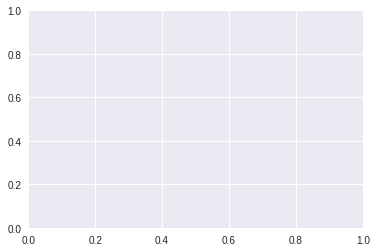

In [12]:
sns.histplot(x='tenure', data=df[df['Churn'] == 'Yes']);

*Example Note: A histogram was chosen to show the distribution of tenure of churned customers. Alternatively, a violin plot or a box plot may also be used.*

**Answer**: 75% of churned customers stayed with the company 2.5 years before leaving. 50% of churned customers left in just 10 months.

**Q1: What are the most correlated attributes with customer churn?**

Churn               1.000000
Contract           -0.396118
tenure             -0.352041
OnlineSecurity     -0.331890
TechSupport        -0.329578
OnlineBackup       -0.291608
DeviceProtection   -0.281349
PaymentMethod      -0.262684
TotalCharges       -0.229254
StreamingMovies    -0.205825
StreamingTV        -0.204735
MonthlyCharges      0.192997
PaperlessBilling    0.192341
Dependents         -0.163015
SeniorCitizen       0.150239
Partner            -0.148791
InternetService    -0.047184
MultipleLines      -0.035290
customerID         -0.016183
PhoneService        0.011601
gender             -0.008384
Name: Churn, dtype: float64

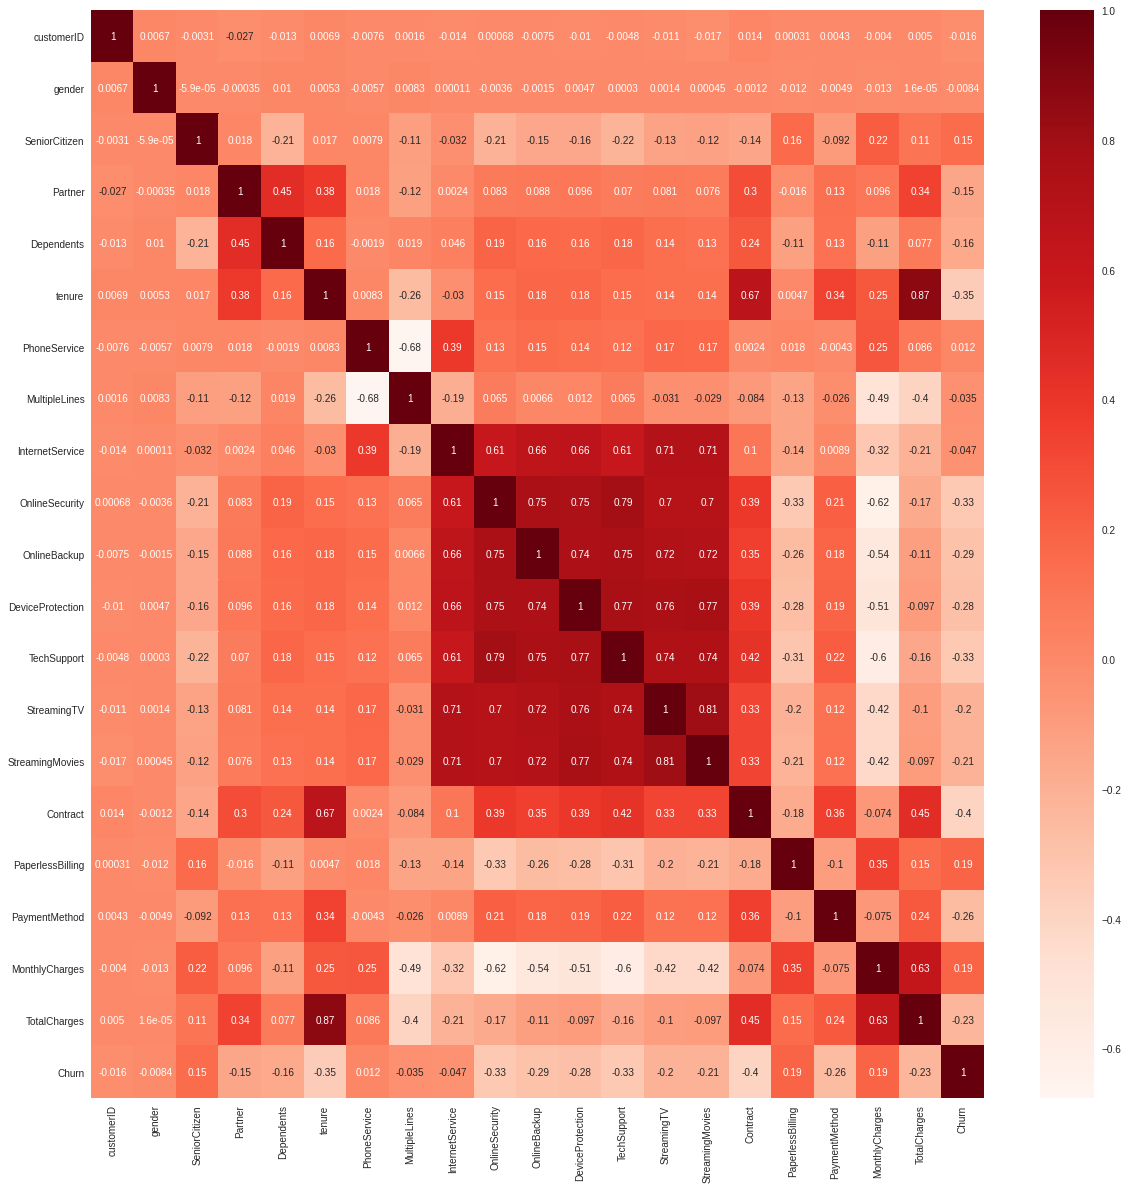

In [13]:
df_encoded = df.copy()

col = df_encoded.select_dtypes(include= [object, 'category']).columns
df_encoded[col]= df_encoded[col].transform(lambda x: x.astype('category').cat.codes)

df_encoded
corr =df_encoded.corr()
corr

plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='Reds', annot=True)

# correlation_table=df.corr()

corr=corr['Churn']

corr=corr.sort_values(ascending=False,key=lambda x: x.abs())
corr
# most correlated attribute 



**Q2: Are senior citizens more likely to churn than non-senior citizens?**

--------------------------------------------------------------------------------
senior citizens churning are at a rate of:  41.51943462897527 %
non_senior citizens churning are are at a rate of:  23.53543979504697 %
senior citizens are more likely to churn


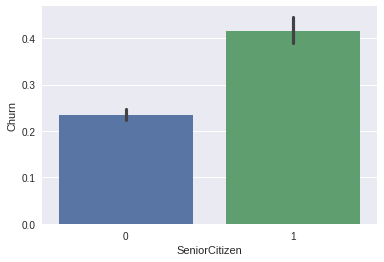

In [17]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category').cat.codes
order = df[['SeniorCitizen', 'Churn']].groupby('SeniorCitizen').mean().sort_values('SeniorCitizen').index
order
ax = sns.barplot(x='SeniorCitizen', y='Churn', data=df, order=order);
print('--------------------------------------------------------------------------------')
x=df[df['Churn']==1]
count=x['Churn'].count()
y=x.loc[df['SeniorCitizen'] == 1, 'Churn'].count()
q=df.loc[df['SeniorCitizen'] == 1, 'Churn'].count()
senior_citizens=y/q*100
g=x.loc[df['SeniorCitizen'] == 0, 'Churn'].count()
s=df.loc[df['SeniorCitizen'] == 0, 'Churn'].count()
Non_senior_citizens=g/s*100
print("senior citizens churning are at a rate of: ",senior_citizens,'%')
print("non_senior citizens churning are are at a rate of: ",Non_senior_citizens,'%')
print('senior citizens are more likely to churn')
# non-senio r citizens are more likely to churn

**Q3: Which payment method has the highest churn rate?**

Electronic check rate is 45.14066496163683 %
Mailed check rate is 19.12772585669782 %
Bank transfer (automatic) rate is 16.579292267365663 %
Credit card (automatic) rate is 9.761295822676896 %
according to the barplot the payment method that highest has the highest churn rate is Electronic check 


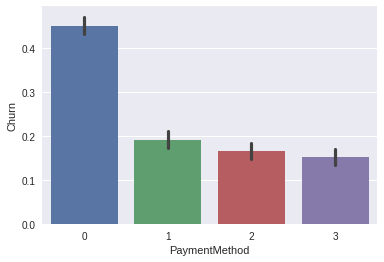

In [16]:
df['Churn'] = df['Churn'].astype('category').cat.codes
df['PaymentMethod'].astype('category').cat.codes

x = sns.barplot(x='PaymentMethod', y='Churn', data=df)

x=df[df['Churn']==1]
Electronic_check=x.loc[df['PaymentMethod'] == 0, 'Churn'].count()
j=df.loc[df['PaymentMethod'] == 0, 'Churn'].count()
Electronic_check=Electronic_check/j*100

Mail_check=x.loc[df['PaymentMethod'] == 1, 'Churn'].count()
t=df.loc[df['PaymentMethod'] == 1, 'Churn'].count()
Mail_check=Mail_check/t*100

Bank_transfer=x.loc[df['PaymentMethod'] == 2, 'Churn'].count()
v=df.loc[df['PaymentMethod'] == 2, 'Churn'].count()
Bank_transfer=Bank_transfer/v*100

Credit_card=x.loc[df['PaymentMethod'] == 3, 'Churn'].count()
f=df.loc[df['PaymentMethod'] == 0, 'Churn'].count()
Credit_card=Credit_card/f*100

print("Electronic check rate is",Electronic_check,'%')
print("Mailed check rate is",Mail_check,'%')
print("Bank transfer (automatic) rate is",Bank_transfer,'%')
print("Credit card (automatic) rate is",Credit_card,'%')
print('according to the barplot the payment method that highest has the highest churn rate is Electronic check ')
# the payment method that has the highest churn rate is Electronic check

## Modelling

In [ ]:
df_encoded

In [ ]:

from sklearn.model_selection import train_test_split
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

## Evaluation

In [ ]:
nb_model.score(X_test, y_test)

## Bonus (Optional)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


In [ ]:
knn_model.score(X_test, y_test)